In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
df = pd.read_csv('/content/haberman.csv',names=["age","operation_year","axil_nodes_det","survival_status"])
df.head()

,age,operation_year,axil_nodes_det,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_year   306 non-null    int64
 2   axil_nodes_det   306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
df.describe()

,age,operation_year,axil_nodes_det,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

**Takeaway :-** 
- 225 patients survived more than 5 years after operation.
- 81 patients died within 5 years.

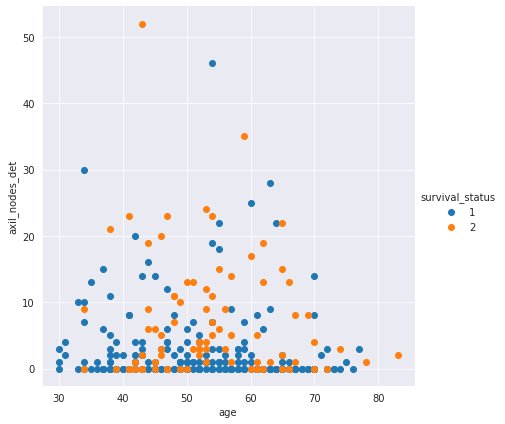

In [13]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="survival_status",height=6).map(plt.scatter,"age","axil_nodes_det").add_legend()
plt.show()

**Takeaway :-**
- Survival rate is higher when axil nodes <=10.
- As the number of detected axil nodes increases there are more people who did not survive more than 5 years.


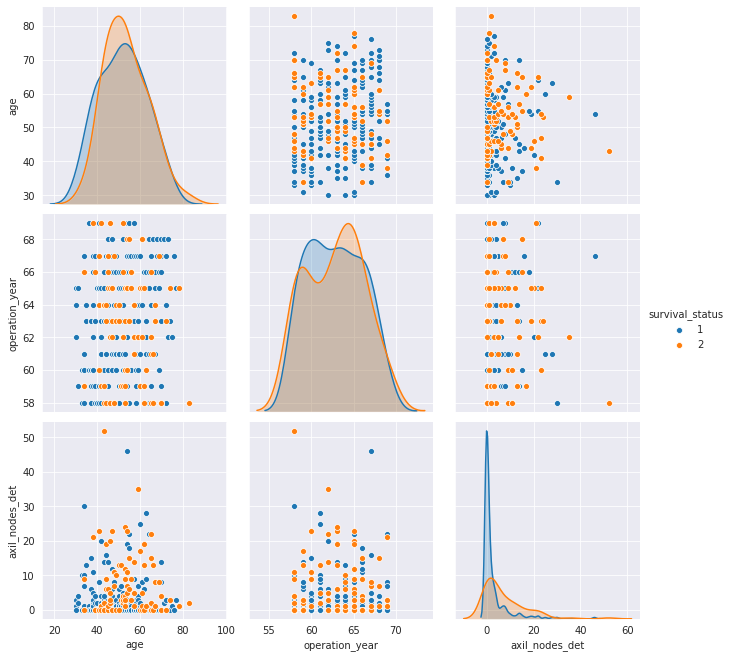

In [14]:
sns.pairplot(df,hue = "survival_status",height = 3)
plt.show()

**Takeaway :-**
- Axil nodes detection is seems to be most useful feature.

<function matplotlib.pyplot.show>

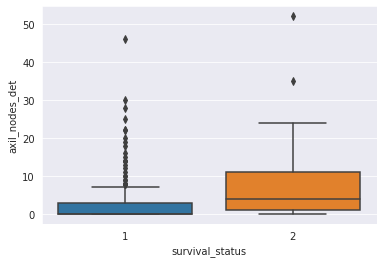

In [15]:
sns.boxplot(x="survival_status",y="axil_nodes_det",data=df)
plt.show

Takeaway :-
- People who survived more than 5 years had lesse number od axil_nodes than those who did not.


#Histogram, PDF of splitted data

In [0]:
survived_df = df[df.survival_status == 1] 
not_survived_df = df[df.survival_status == 2]

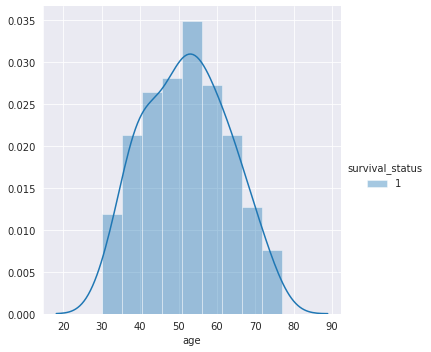

In [23]:
#Histogram of people who survived more than years
sns.FacetGrid(survived_df,hue="survival_status",height = 5).map(sns.distplot,'age').add_legend()
plt.show()

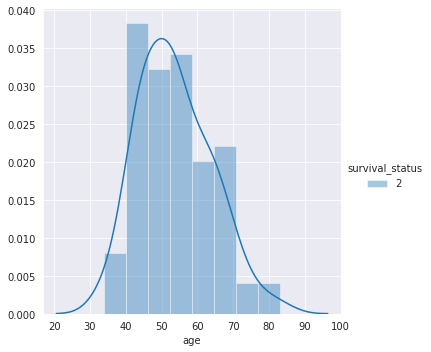

In [24]:
#Histogram of people who  did not survived more than years
sns.FacetGrid(not_survived_df,hue="survival_status",height = 5).map(sns.distplot,'age').add_legend()
plt.show()

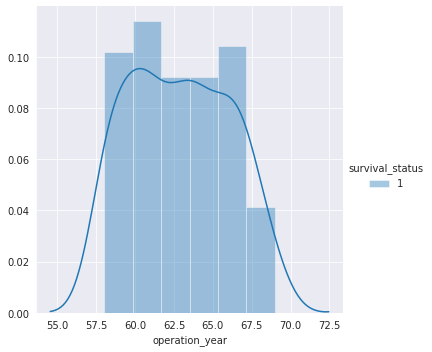

In [30]:
sns.FacetGrid(survived_df,hue="survival_status",height = 5).map(sns.distplot,'operation_year').add_legend()
plt.show()

**Takeaway :-**
- Chances of surviving were higest in year 60-62

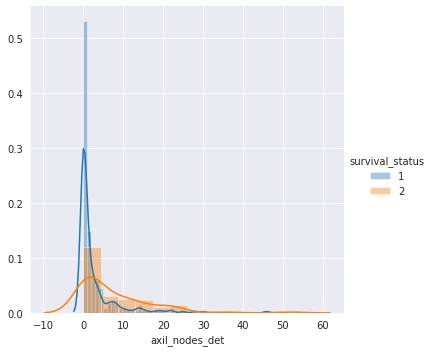

In [27]:
sns.FacetGrid(df,hue="survival_status",height = 5).map(sns.distplot,'axil_nodes_det').add_legend()
plt.show()

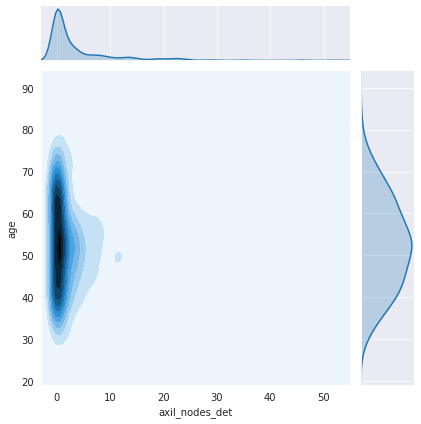

In [28]:
sns.jointplot(x="axil_nodes_det",y="age",data=df,kind = "kde")
plt.show()

Conclusion
- Number of detected axil nodes is most useful feature for classification.
- People who survied were mainly between age 50-55.